In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.columns=['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']

In [4]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [5]:
graduate_ppl = df[df['education'] == "Graduate"]
not_graduate_ppl = df[df['education']=="NotGraduate"]


In [6]:
# not_graduate_ppl

In [7]:
# graduate_ppl['loan_status'].value_counts()

In [8]:
# not_graduate_ppl['loan_status'].value_counts()

In [9]:
column_name = ['self_employed','loan_status','education']
for column in column_name:
    df[column] = df[column].str.replace(' ', '')

print(df)


# another way 
# for column in column_name:
#     df[column] = df[column].map(lambda x:x[1:])

      loan_id  no_of_dependents    education self_employed  income_annum  \
0           1                 2     Graduate            No       9600000   
1           2                 0  NotGraduate           Yes       4100000   
2           3                 3     Graduate            No       9100000   
3           4                 3     Graduate            No       8200000   
4           5                 5  NotGraduate           Yes       9800000   
...       ...               ...          ...           ...           ...   
4264     4265                 5     Graduate           Yes       1000000   
4265     4266                 0  NotGraduate           Yes       3300000   
4266     4267                 2  NotGraduate            No       6500000   
4267     4268                 1  NotGraduate            No       4100000   
4268     4269                 1     Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        2990000

In [10]:
self = df[df['self_employed']== 'Yes']

In [11]:
self['loan_status'].value_counts()

loan_status
Approved    1338
Rejected     812
Name: count, dtype: int64

In [12]:
nself = df[df['self_employed']== 'No']

In [13]:
nself['loan_status'].value_counts()

loan_status
Approved    1318
Rejected     801
Name: count, dtype: int64

In [14]:
df2  = graduate_ppl[(graduate_ppl['self_employed']=='Yes')&(graduate_ppl['cibil_score'] >=700)&(graduate_ppl['income_annum'] >= 5065720.930232558
)]

In [15]:
graduate_ppl.shape

(0, 13)

In [16]:
df2['loan_status'].value_counts()

Series([], Name: count, dtype: int64)

In [17]:
df.shape

(4269, 13)

In [18]:
df2.shape

(0, 13)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

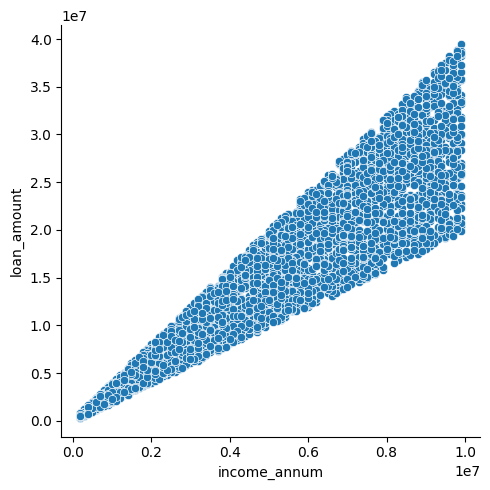

In [20]:
sns.relplot(x='income_annum',y="loan_amount",data=df) 
plt.show()


In [21]:
df3 = pd.get_dummies(df,drop_first='if_binary').astype(int)
df3.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_NotGraduate', 'self_employed_Yes', 'loan_status_Rejected'],
      dtype='object')

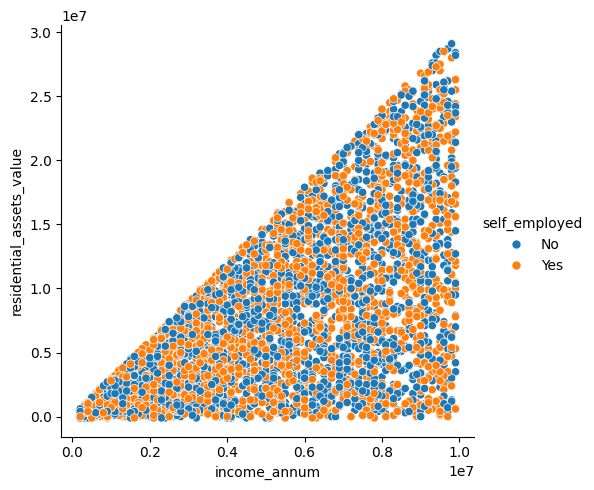

In [22]:
sns.relplot(x='income_annum',y="residential_assets_value",data=df,hue='self_employed',) 
plt.show()

In [23]:
df3.drop('loan_id',axis=1,inplace=True)

In [24]:
x = df3.drop('loan_status_Rejected',axis=1)
y = df3[['loan_status_Rejected']]   

In [25]:
### ANN standard scaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X = scaler.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
#deel learning algo from sklearn
# !pip install tensorflow

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.16.1'

In [31]:
from tensorflow.keras.layers import Dense #hidden layer
from tensorflow.keras.models import Sequential

In [32]:
x_train.shape

(3415, 11)

In [33]:
ann_model = Sequential()
ann_model.add(Dense(units=68,activation='relu',input_dim=11))
# hidden layer
ann_model.add(Dense(units=32,activation='relu'))
ann_model.add(Dense(units=12,activation='relu'))
# ouput layer
ann_model.add(Dense(units=1,activation='sigmoid'))

ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

c:\Users\Neeru Jangid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# sigmoid:- out put in between 0-1

In [35]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 68)             │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           396 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,433 (13.41 KB)

 Trainable params: 3,433 (13.41 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#training model
history = ann_model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7022 - loss: 0.5855 - val_accuracy: 0.9169 - val_loss: 0.2314
Epoch 2/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9185 - loss: 0.2403 - val_accuracy: 0.9251 - val_loss: 0.1857
Epoch 3/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9251 - loss: 0.1877 - val_accuracy: 0.9356 - val_loss: 0.1701
Epoch 4/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9285 - loss: 0.1807 - val_accuracy: 0.9415 - val_loss: 0.1624
Epoch 5/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9308 - loss: 0.1666 - val_accuracy: 0.9461 - val_loss: 0.1521


In [37]:
ann_model.evaluate(x_train,y_train)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.9378 - loss: 0.1537


[0.14314942061901093, 0.9420204758644104]

In [38]:
ann_model.evaluate(x_test,y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.9513 - loss: 0.1420


[0.15209762752056122, 0.9461358189582825]

In [39]:
import pandas as pd

In [40]:
history=pd.DataFrame(history.history)

In [41]:
history

,accuracy,loss,val_accuracy,val_loss
0,0.823133,0.452204,0.916862,0.231396
1,0.918302,0.222042,0.925059,0.185669
2,0.923865,0.190581,0.935597,0.170062
3,0.931479,0.171764,0.941452,0.162364
4,0.934993,0.159357,0.946136,0.152098


<Axes: >

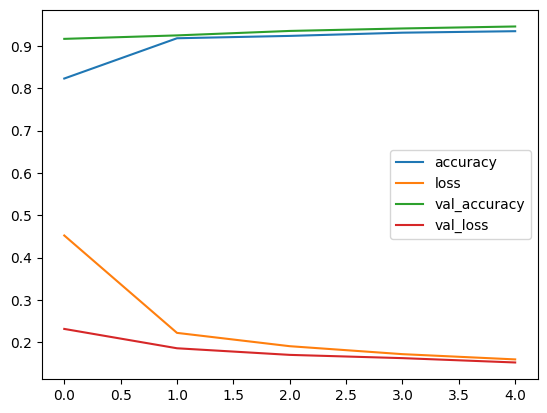

In [42]:
history.plot()

In [43]:
#model define
# model train
# model evaluate
# prediction
# model performance
# model save

prediction

In [44]:
prediction=ann_model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
prediction[0][0]

0.9729751

In [46]:
# if prediction[0]>0.5:
#     print(1)
# else:
#     print(0)

predictions = (prediction <0.5).astype(int).ravel()
predictions
                 

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,

In [47]:
# actual -- > y_test
# prediction = predictions
# confusion matrix

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [49]:
matrix = confusion_matrix(y_test,predictions)

In [50]:
import seaborn as sns

<Axes: >

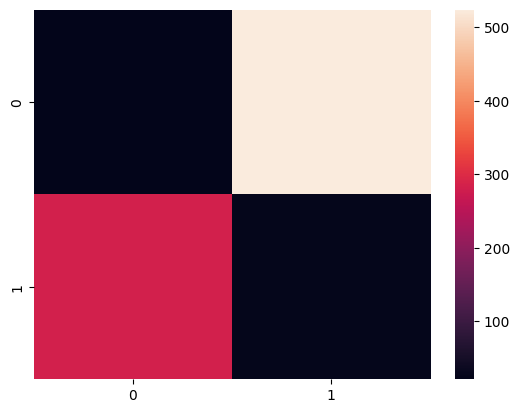

In [51]:
sns.heatmap(matrix)

In [52]:
matrix

array([[ 21, 524],
       [284,  25]], dtype=int64)

In [53]:
cr = classification_report(y_test,predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.07      0.04      0.05       545
           1       0.05      0.08      0.06       309

    accuracy                           0.05       854
   macro avg       0.06      0.06      0.05       854
weighted avg       0.06      0.05      0.05       854



In [54]:
#model save
ann_model.save("ann_model.h5")

In [55]:
import joblib
joblib.dump(scaler,'scaler.lb')

['scaler.lb']

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model = load_model('ann_model.h5')

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 68)             │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           396 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,435 (13.42 KB)

 Trainable params: 3,433 (13.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [59]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import tensorflow as tf

In [5]:
import nbformat
from nbconvert import ScriptExporter

def convert_notebook_to_script(notebook_filename):
    try:
        # Load the notebook with UTF-8 encoding
        with open(notebook_filename, "r", encoding="utf-8") as f:
            notebook = nbformat.read(f, as_version=4)

        # Convert to Python script
        script_exporter = ScriptExporter()
        script, _ = script_exporter.from_notebook_node(notebook)

        # Save the Python script
        script_filename = notebook_filename.replace(".ipynb", ".py")
        with open(script_filename, "w", encoding="utf-8") as f:
            f.write(script)

        print(f"Successfully converted '{notebook_filename}' to '{script_filename}'")

    except FileNotFoundError:
        print(f"Error: File '{notebook_filename}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
convert_notebook_to_script("day28.ipynb")



Successfully converted 'day28.ipynb' to 'day28.py'
